In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils.vis_utils import plot_model  

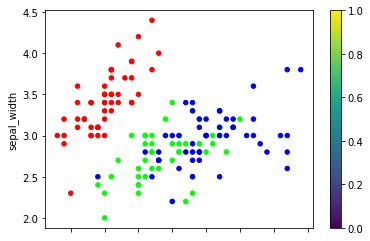

In [ ]:
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
dummy_y = to_categorical(encoded_Y)

dataframe.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
dataframe.plot(kind='scatter', x='sepal_length', y='sepal_width', c=dummy_y, colormap='viridis')
plt.show()

In [ ]:
print(len(dataset))

150


In [ ]:
architecture1 = Sequential()
architecture1.add(Dense(8, input_dim=4, activation='relu'))
architecture1.add(Dense(3, activation='softmax'))

architecture2 = Sequential()
architecture2.add(Dense(16, input_dim=4, activation='relu'))
architecture2.add(Dense(8, activation='relu'))
architecture2.add(Dense(3, activation='softmax'))

architecture3 = Sequential()
architecture3.add(Dense(64, input_dim=4, activation='relu'))
architecture3.add(Dense(32, activation='relu'))
architecture3.add(Dense(16, activation='relu'))
architecture3.add(Dense(3, activation='softmax'))

architecture4 = Sequential()
architecture4.add(Dense(32, input_dim=4, activation='relu'))
architecture4.add(Dense(16, activation='relu'))
architecture4.add(Dense(8, activation='relu'))
architecture4.add(Dense(3, activation='softmax'))

architecture5 = Sequential()
architecture5.add(Dense(64, input_dim=4, activation='relu'))
architecture5.add(Dense(32, activation='relu'))
architecture5.add(Dense(16, activation='relu'))
architecture5.add(Dense(8, activation='relu'))
architecture5.add(Dense(3, activation='softmax'))

models = [architecture1, architecture2, architecture3, architecture4, architecture5]

for model in models:
    opt = optimizers.Adam(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = []
architecture_history = []
epochs_list = [30, 50, 100]
batch_sizes = [5, 10, 30]
model_num = 1
for i, model in enumerate(models):
    for epochs in epochs_list:
        for batch_size in batch_sizes:
            print("Training architecture #", i+1, " with epochs=", epochs, ", batch_size=", batch_size, " (model #", model_num, ")" , sep="")
            hist = model.fit(X, dummy_y, epochs=epochs, batch_size=batch_size, verbose=0)
            history.append(hist)
            architecture_history.append(model)
            model_num += 1

Training architecture #1 with epochs=30, batch_size=5 (model #1)
Training architecture #1 with epochs=30, batch_size=10 (model #2)
Training architecture #1 with epochs=30, batch_size=30 (model #3)
Training architecture #1 with epochs=50, batch_size=5 (model #4)
Training architecture #1 with epochs=50, batch_size=10 (model #5)
Training architecture #1 with epochs=50, batch_size=30 (model #6)
Training architecture #1 with epochs=100, batch_size=5 (model #7)
Training architecture #1 with epochs=100, batch_size=10 (model #8)
Training architecture #1 with epochs=100, batch_size=30 (model #9)
Training architecture #2 with epochs=30, batch_size=5 (model #10)
Training architecture #2 with epochs=30, batch_size=10 (model #11)
Training architecture #2 with epochs=30, batch_size=30 (model #12)
Training architecture #2 with epochs=50, batch_size=5 (model #13)
Training architecture #2 with epochs=50, batch_size=10 (model #14)
Training architecture #2 with epochs=50, batch_size=30 (model #15)
Traini

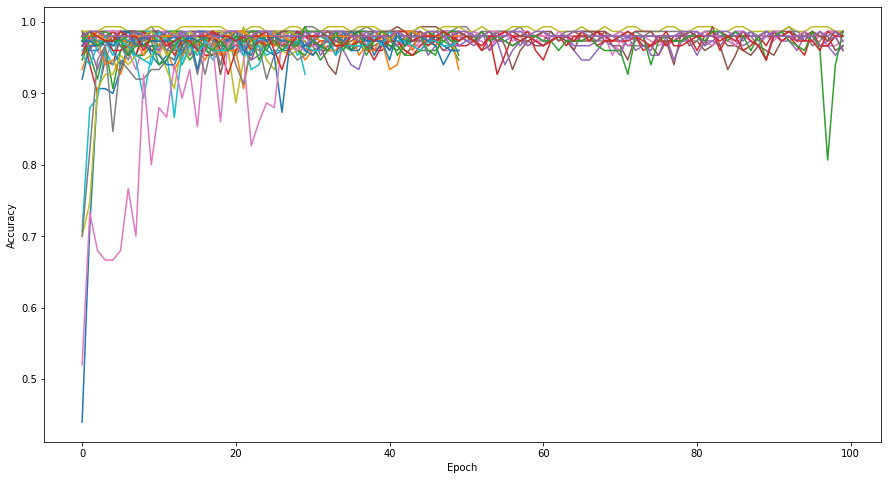

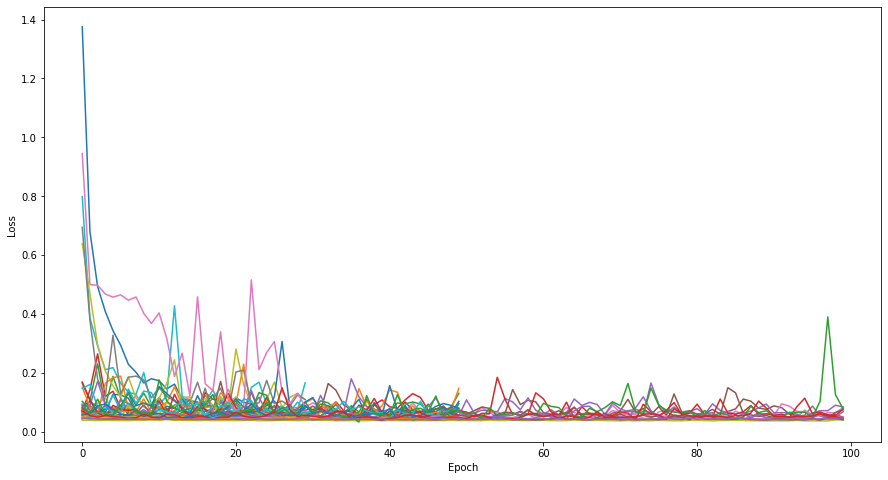

In [ ]:
fig = plt.figure(figsize=(15, 8))
for hist in history:
    accuracy = hist.history['accuracy']
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy)

fig = plt.figure(figsize=(15, 8))
for hist in history:
    loss = hist.history['loss']
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss)

Best model: #2

accuracy: 0.987
epochs: 30
batch_size: 10.0
steps: 15 

Model: "sequential_203"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_572 (Dense)           (None, 8)                 40        
                                                                 
 dense_573 (Dense)           (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
None 

architecture:


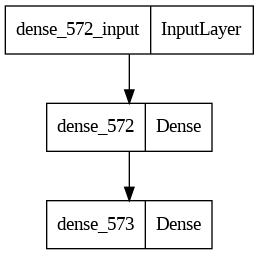

In [ ]:
accuracies = [hist.history['accuracy'][-1] for hist in history]
model_num = accuracies.index(max(accuracies))
print("Best model: #", model_num+1, "\n", sep="")
print("accuracy:", round(max(accuracies), 3))
print("epochs:", history[model_num].params['epochs'])
print("batch_size:", len(dataset) / history[model_num].params['steps'])
print("steps:", history[model_num].params['steps'], "\n")
print(architecture_history[model_num].summary(), "\n")
print("architecture:")
plot_model(architecture_history[model_num])